#Predicting the potential employee churn rate at a company based on current employee data with quantified factors 
#affecting the attrition. I have used data functional data called HR Analytics Employee Attrition & Performance.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score 
from sklearn.metrics import confusion_matrix,classification_report,RocCurveDisplay
from sklearn import metrics

In [2]:
#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading data with pandas
data = pd.read_csv('employee.csv')
#when notebook and csv is in the same folder you can run directly

In [4]:
# Dataset columns
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# checking head of data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# check shape of data
data.shape

(1470, 35)

In [7]:
#Check Data Types
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
#Print a concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
#The dataset contains several numerical and categorical columns
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

In [10]:
# summary statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


Exploratory Data Analysis

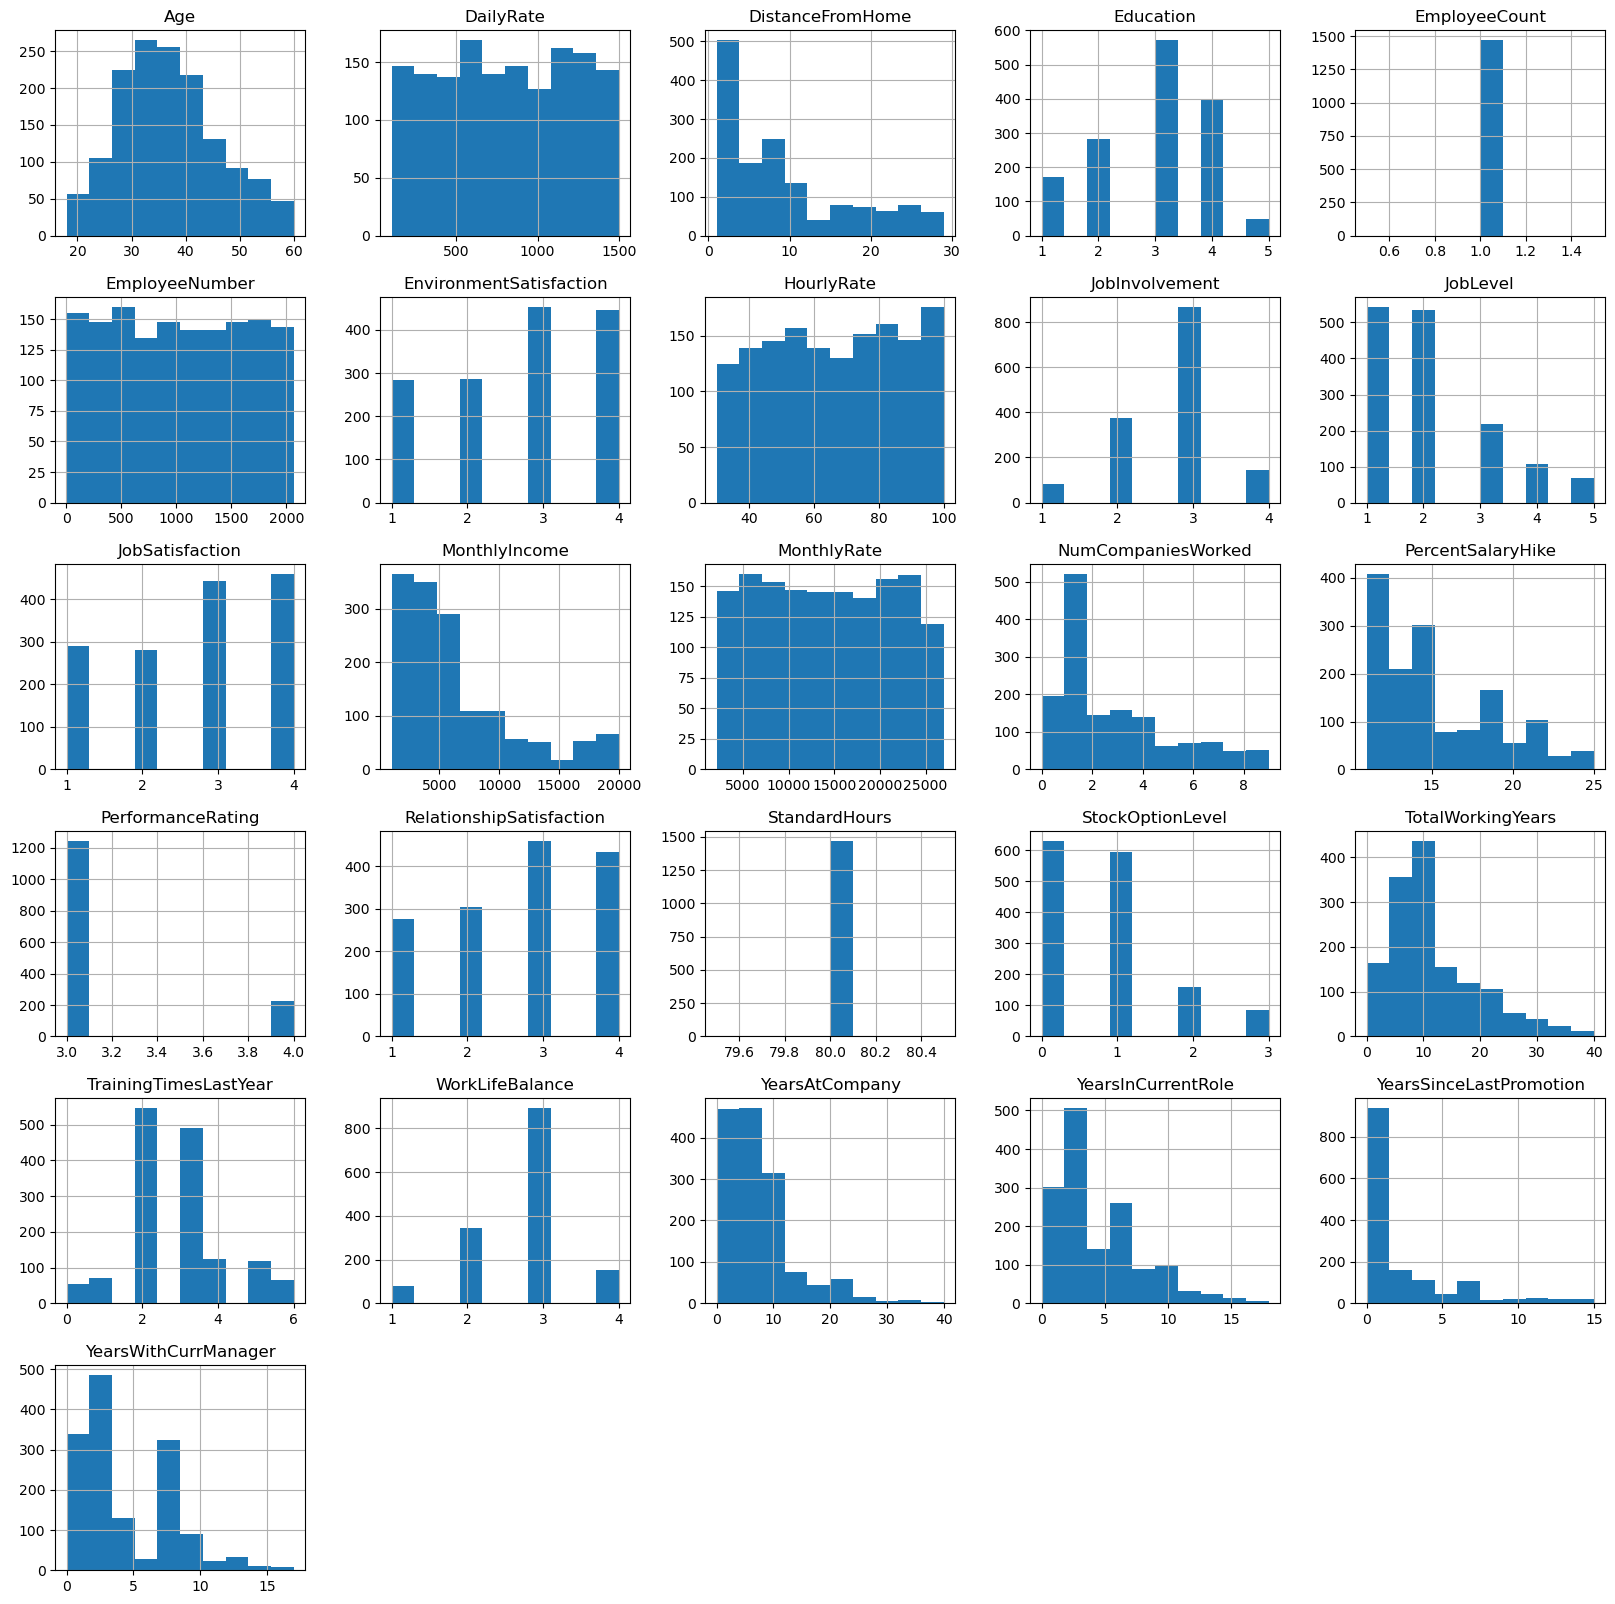

In [11]:
#histograms for numerical features
data.hist(figsize=(20,20))
plt.show()

MonthlyIncome DistanceFromHome, YearsAtCompany are right-skewed and EmployeeCount and StandardHours are constant values for all employees

In [12]:
# Dropping 'EmployeeCount' , 'Standardhours' and 'Over18' as they are not changing from one employee to another.
# Dropping 'EmployeeNumber' as it will not affect prediction
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis=1, inplace=True)

In [13]:
# check missing values
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Text(0.5, 1.0, 'Employees Distribution By Marital Status')

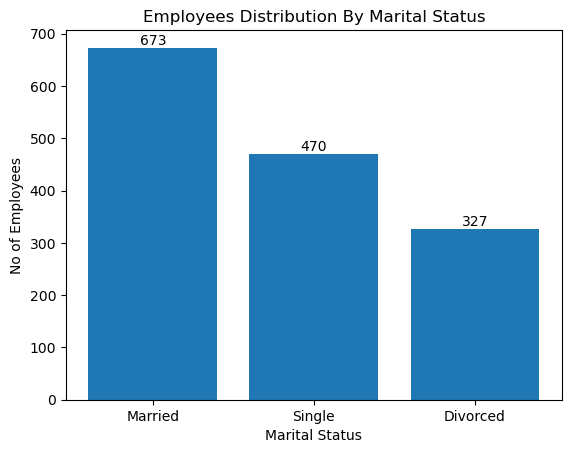

In [14]:
# bar plot MaritalStatus variable
cnt_data = data['MaritalStatus'].value_counts();

fig, pt = plt.subplots()
bars = pt.bar(cnt_data.index, cnt_data.values)
pt.bar_label(bars)

# Add some text for labels, title 
pt.set_xlabel('Marital Status')
pt.set_ylabel('No of Employees')
pt.set_title('Employees Distribution By Marital Status')

Text(0.5, 1.0, 'Employees Distribution By Gender')

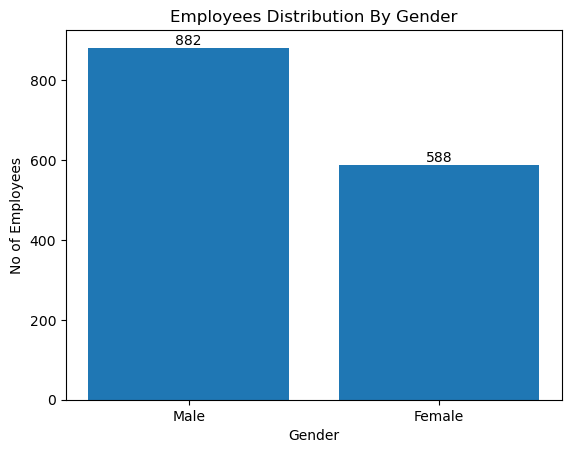

In [15]:
# bar plot Gender variable
cnt_data = data['Gender'].value_counts();

fig, pt = plt.subplots()
bars = pt.bar(cnt_data.index, cnt_data.values)
pt.bar_label(bars)

# Add some text for labels, title 
pt.set_xlabel('Gender')
pt.set_ylabel('No of Employees')
pt.set_title('Employees Distribution By Gender')

Text(0.5, 1.0, 'Employees Distribution By Business Travel frequency')

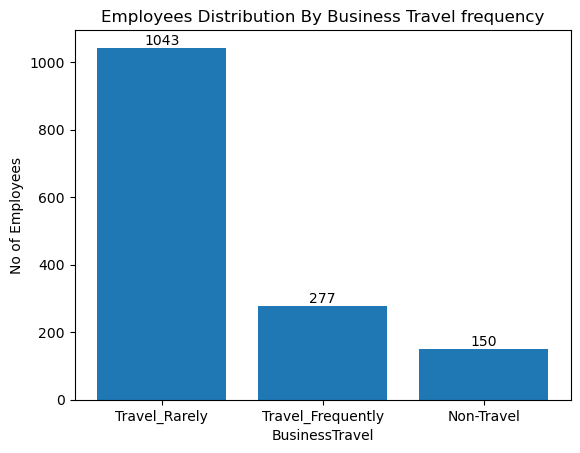

In [16]:
# bar plot BusinessTravel variable
cnt_data = data['BusinessTravel'].value_counts();

fig, pt = plt.subplots()
bars = pt.bar(cnt_data.index, cnt_data.values)
pt.bar_label(bars)

# Add some text for labels, title 
pt.set_xlabel('BusinessTravel')
pt.set_ylabel('No of Employees')
pt.set_title('Employees Distribution By Business Travel frequency')

Text(0.5, 1.0, 'Employees Distribution By Job Role')

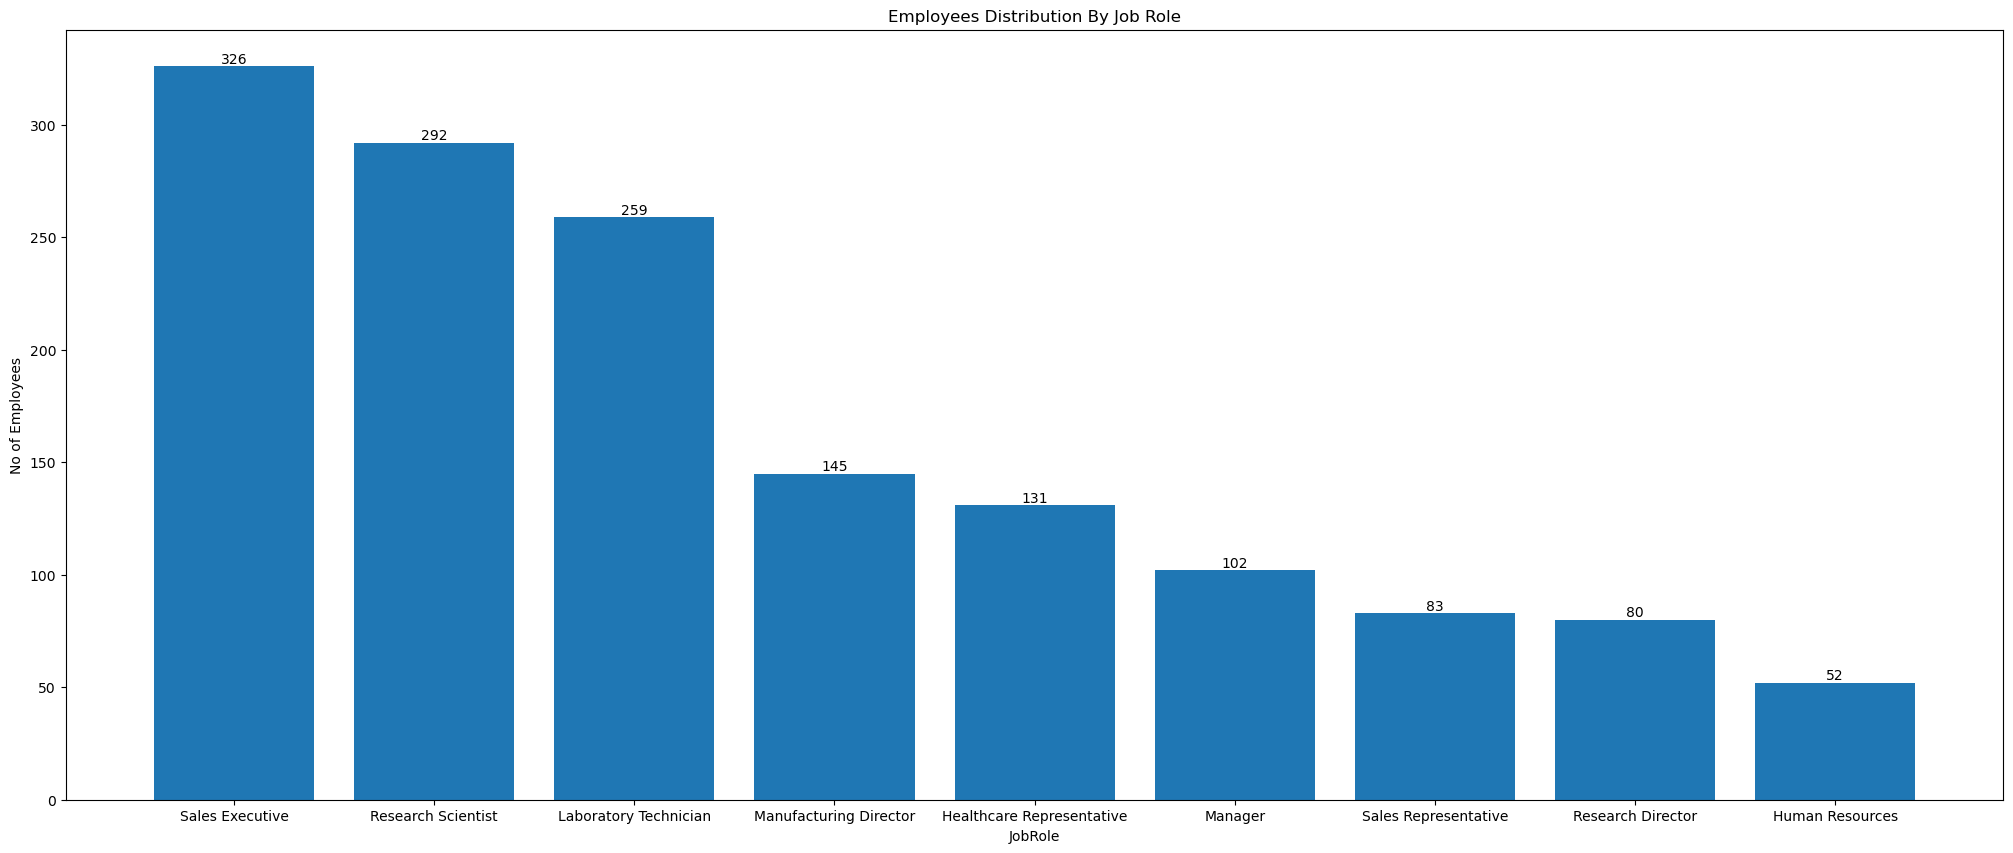

In [17]:
# bar plot JobRole variable
cnt_data = data['JobRole'].value_counts();

fig, pt = plt.subplots(figsize = (25, 10))
bars = pt.bar(cnt_data.index, cnt_data.values)
pt.bar_label(bars)

# Add some text for labels, title 
pt.set_xlabel('JobRole')
pt.set_ylabel('No of Employees')
pt.set_title('Employees Distribution By Job Role')

Text(0.5, 1.0, 'Employees Distribution By OverTime')

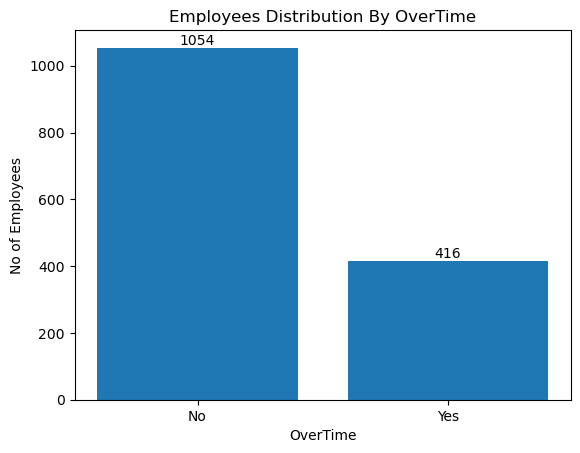

In [18]:
# bar plot OverTime variable
cnt_data = data['OverTime'].value_counts();

fig, pt = plt.subplots()
bars = pt.bar(cnt_data.index, cnt_data.values)
pt.bar_label(bars)

# Add some text for labels, title 
pt.set_xlabel('OverTime')
pt.set_ylabel('No of Employees')
pt.set_title('Employees Distribution By OverTime')

Text(0.5, 1.0, 'Employees Distribution By WorkLifeBalance')

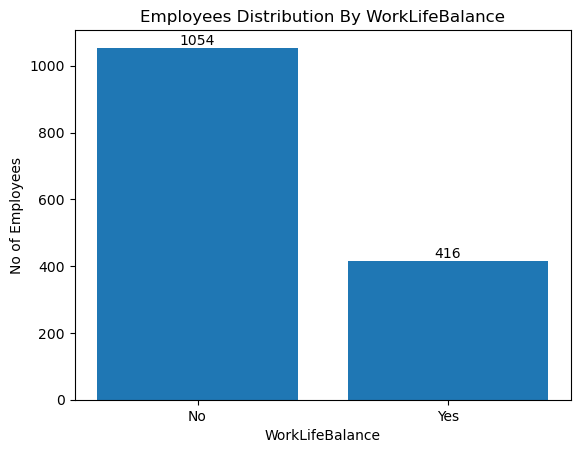

In [19]:
# bar plot WorkLifeBalance variable - A feature related to "Work-Life Balance" was captured as: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'.
cnt_data = data['OverTime'].value_counts();

fig, pt = plt.subplots()
bars = pt.bar(cnt_data.index, cnt_data.values)
pt.bar_label(bars)

# Add some text for labels, title 
pt.set_xlabel('WorkLifeBalance')
pt.set_ylabel('No of Employees')
pt.set_title('Employees Distribution By WorkLifeBalance')

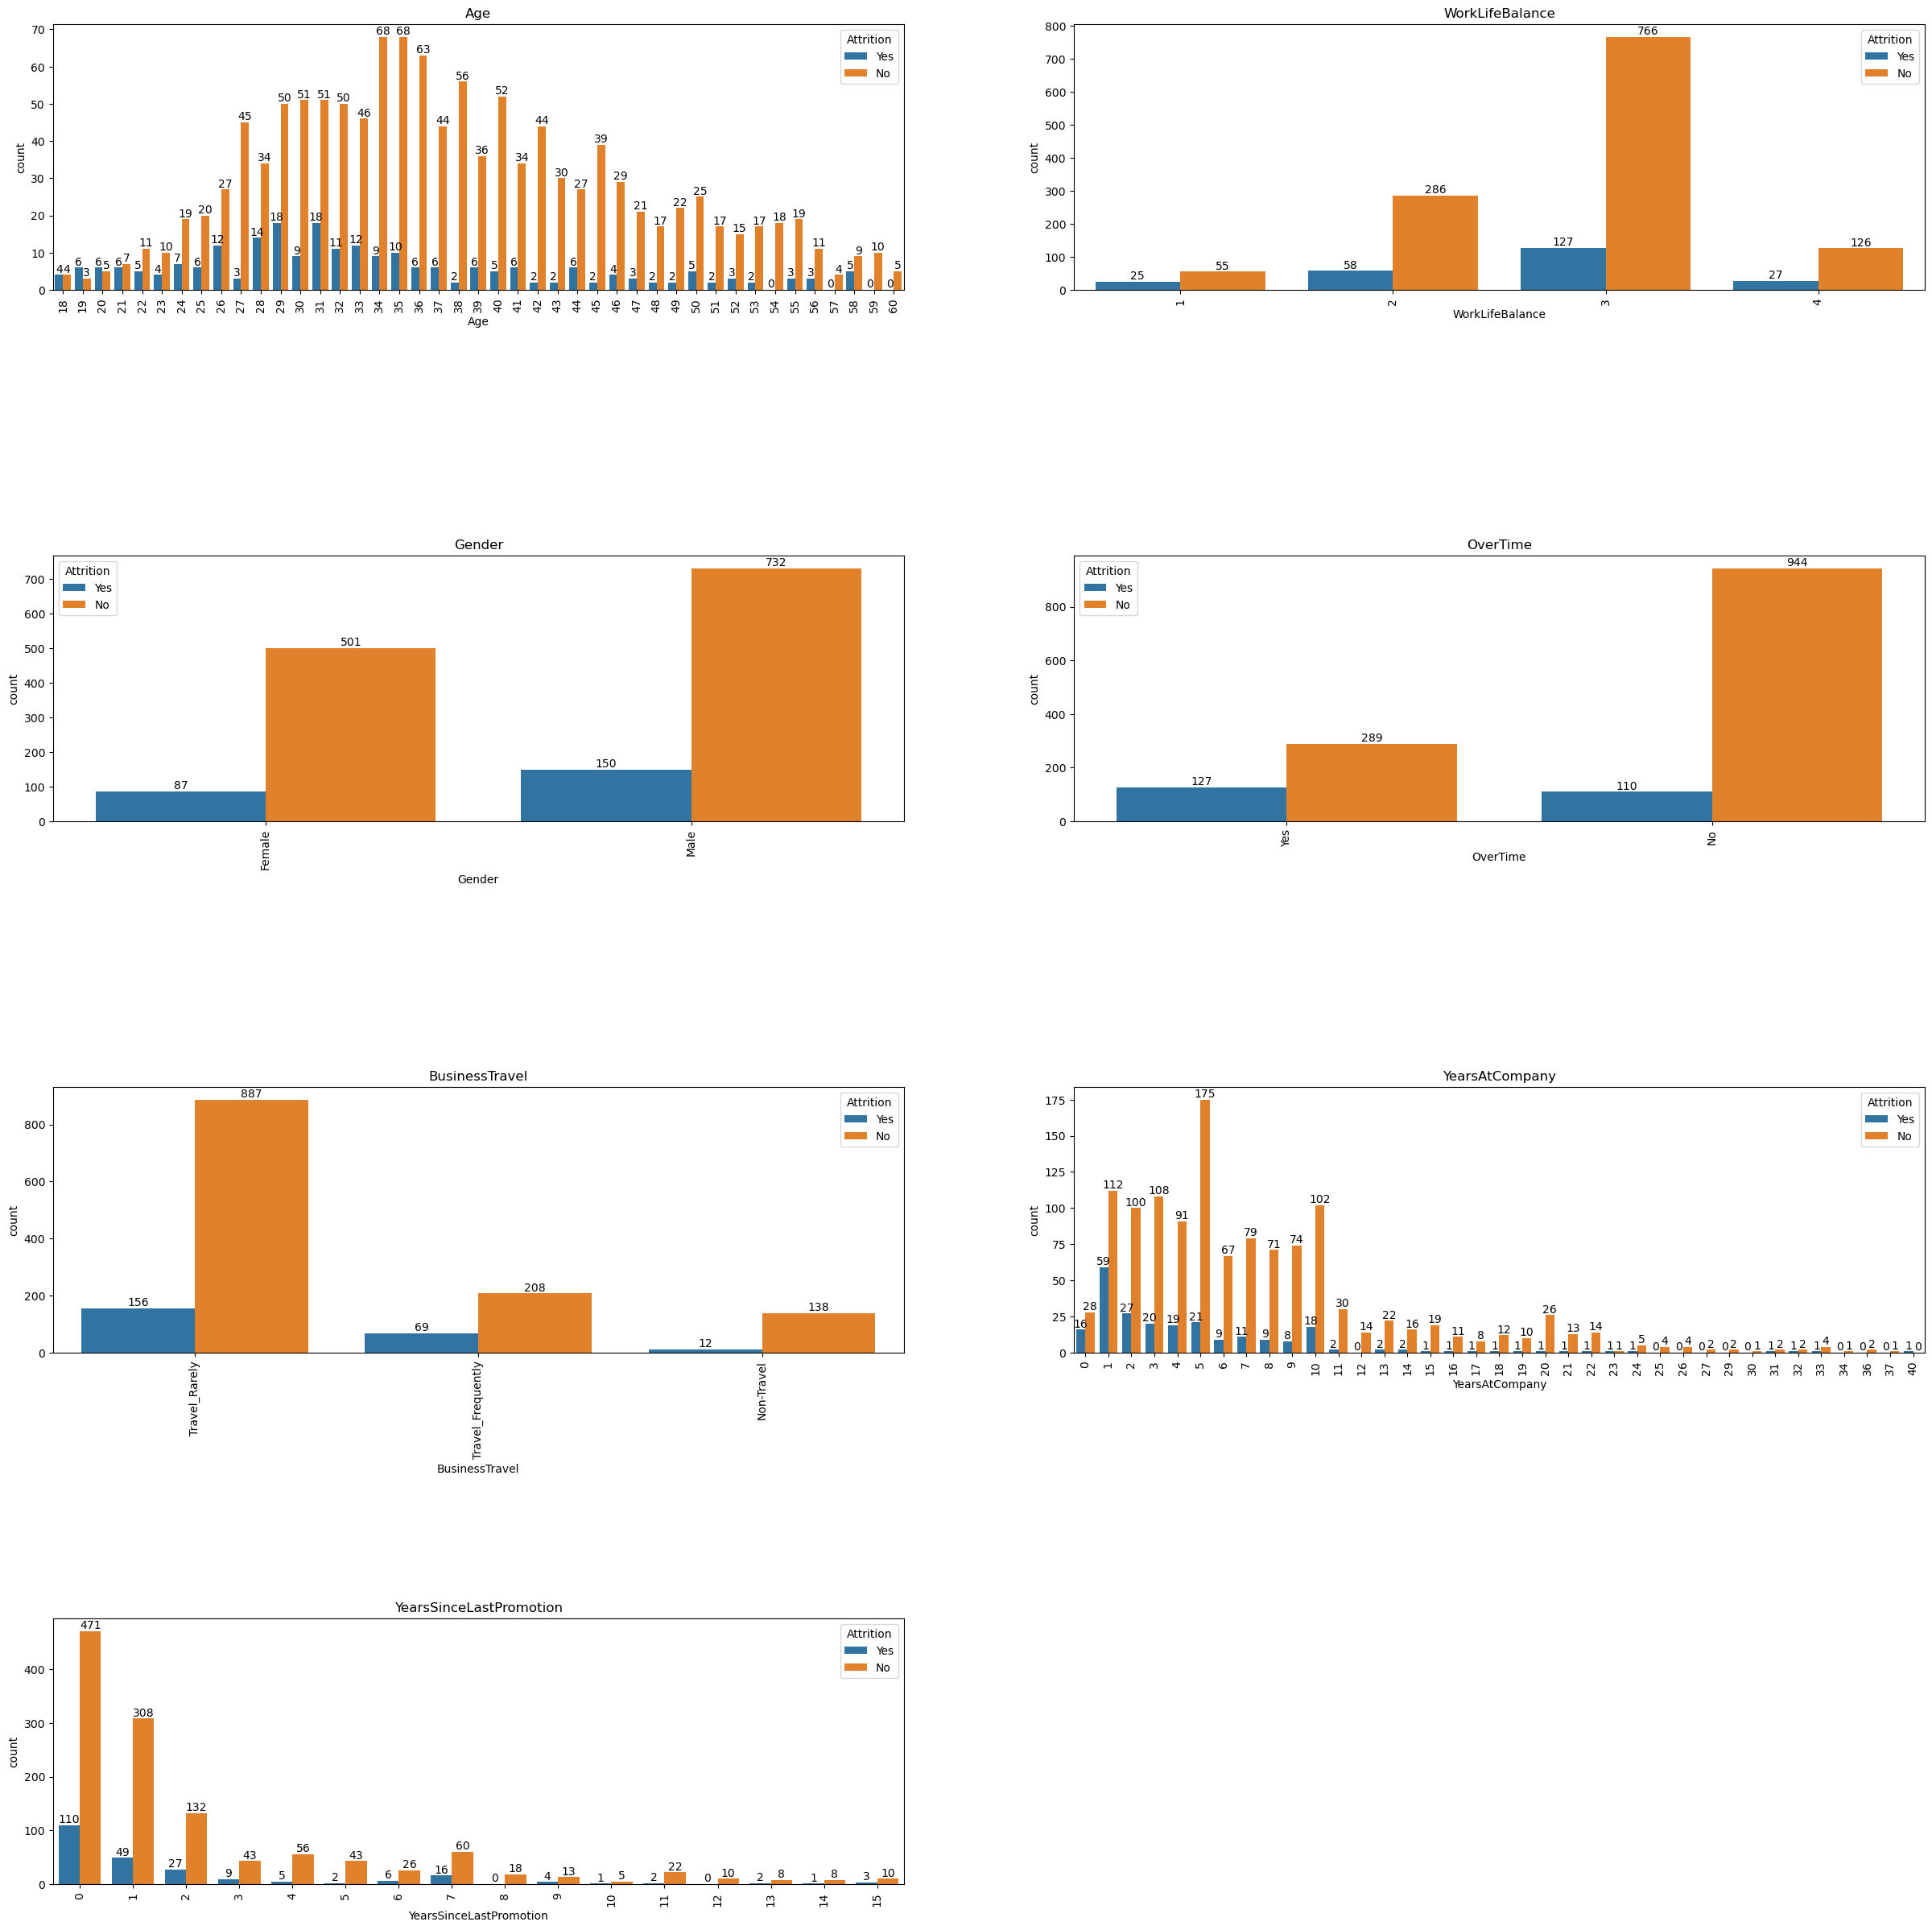

In [20]:
#Analyze Target Variable on Features
features=['Age','WorkLifeBalance','Gender','OverTime','BusinessTravel','YearsAtCompany','YearsSinceLastPromotion']

fig=plt.subplots(figsize=(30,30))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    ax = sns.countplot(x=j,data = data, hue='Attrition')
    plt.xticks(rotation=90)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(j)


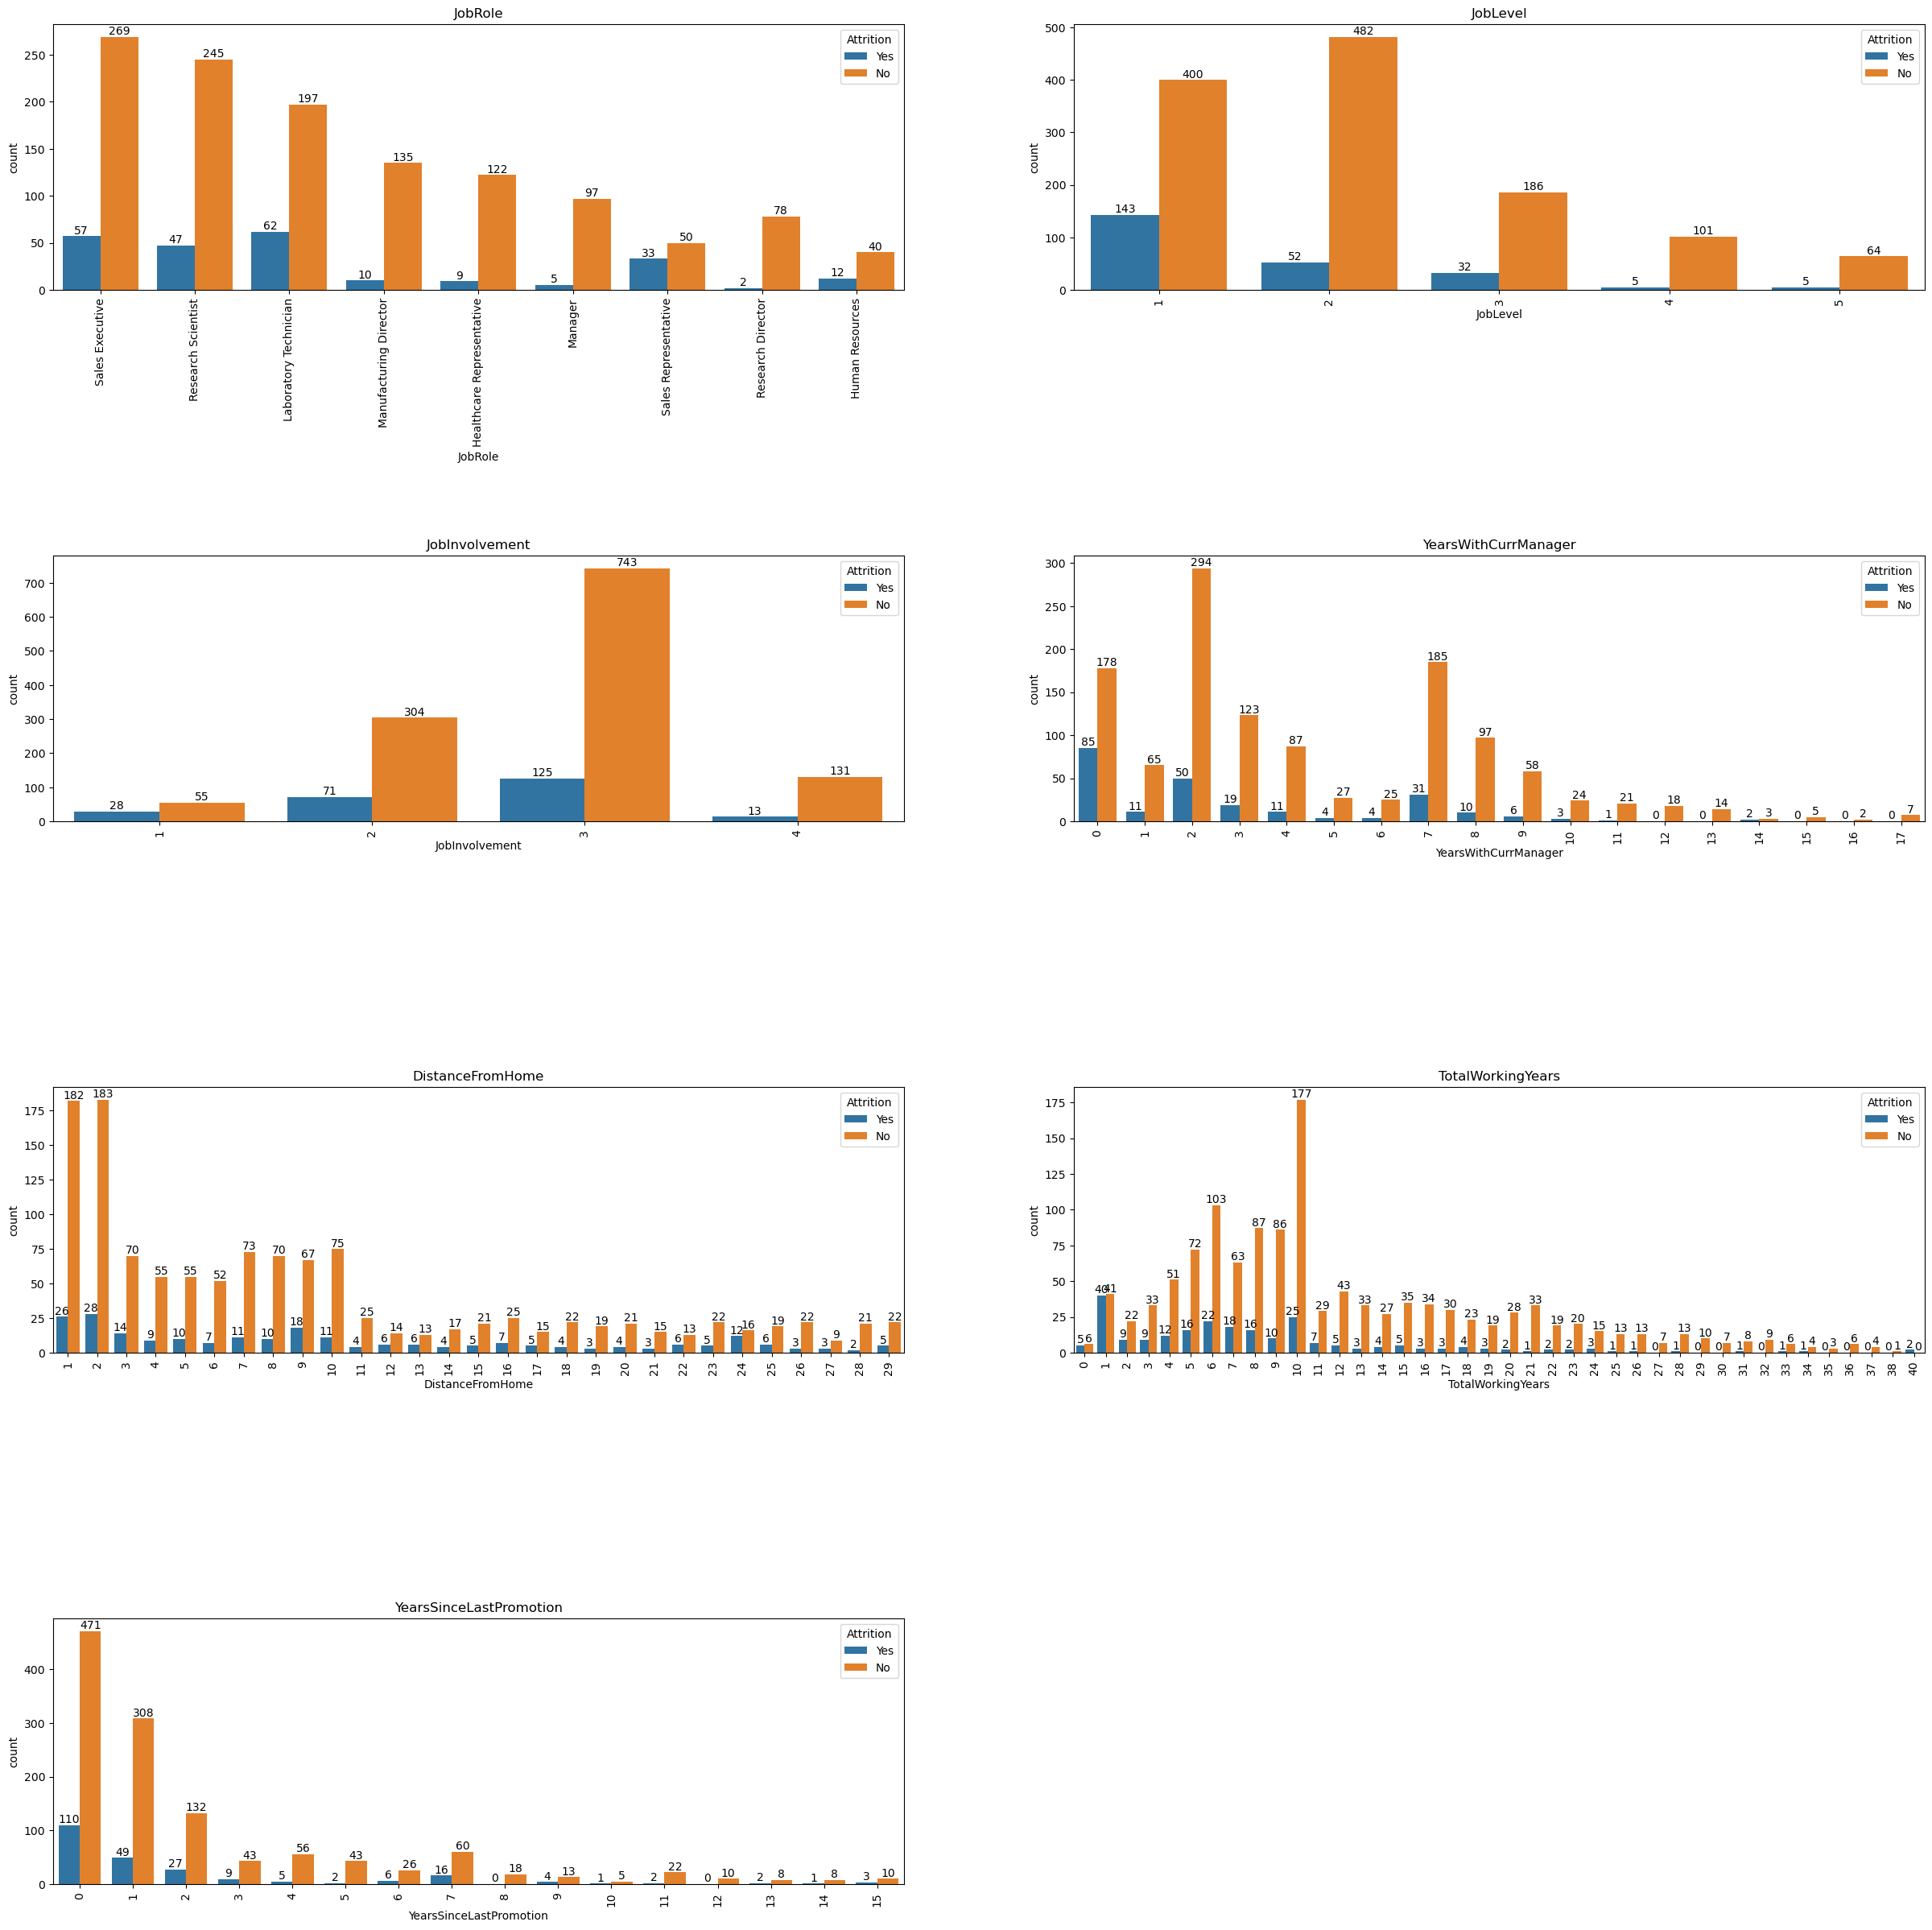

In [21]:
#Analyze Target Variable on Features
features=['JobRole','JobLevel','JobInvolvement','YearsWithCurrManager','DistanceFromHome','TotalWorkingYears','YearsSinceLastPromotion']

fig=plt.subplots(figsize=(30,30))
for i, j in enumerate(features):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 1.0)
    ax = sns.countplot(x=j,data = data, hue='Attrition')
    plt.xticks(rotation=90)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(j)


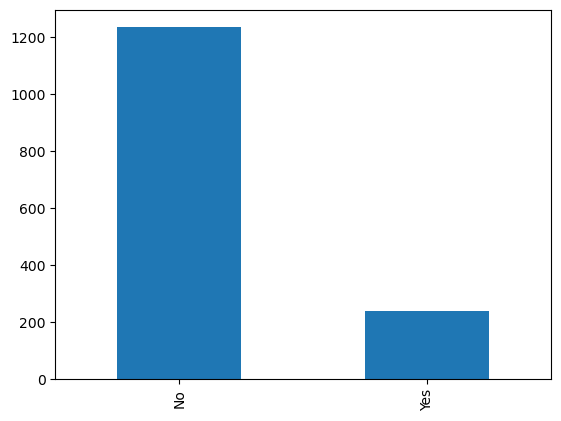

In [22]:
# bar plot target variable
data['Attrition'].value_counts().plot.bar();

In [23]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    data[data['Attrition'] == 'No'].shape[0] / data.shape[0]*100,
    data[data['Attrition'] == 'Yes'].shape[0] / data.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [24]:
# Find correlations with the target and sort
df_HR_trans = data.copy()
df_HR_trans['Target'] = df_HR_trans['Attrition'].apply(
    lambda x: 0 if x == 'No' else 1)
correlations = df_HR_trans.corr()['Target'].sort_values()
print('Most Positive Correlations: \n', correlations.tail(5))
print('\nMost Negative Correlations: \n', correlations.head(5))

Most Positive Correlations: 
 PerformanceRating     0.002889
MonthlyRate           0.015170
NumCompaniesWorked    0.043494
DistanceFromHome      0.077924
Target                1.000000
Name: Target, dtype: float64

Most Negative Correlations: 
 TotalWorkingYears    -0.171063
JobLevel             -0.169105
YearsInCurrentRole   -0.160545
MonthlyIncome        -0.159840
Age                  -0.159205
Name: Target, dtype: float64


<Axes: >

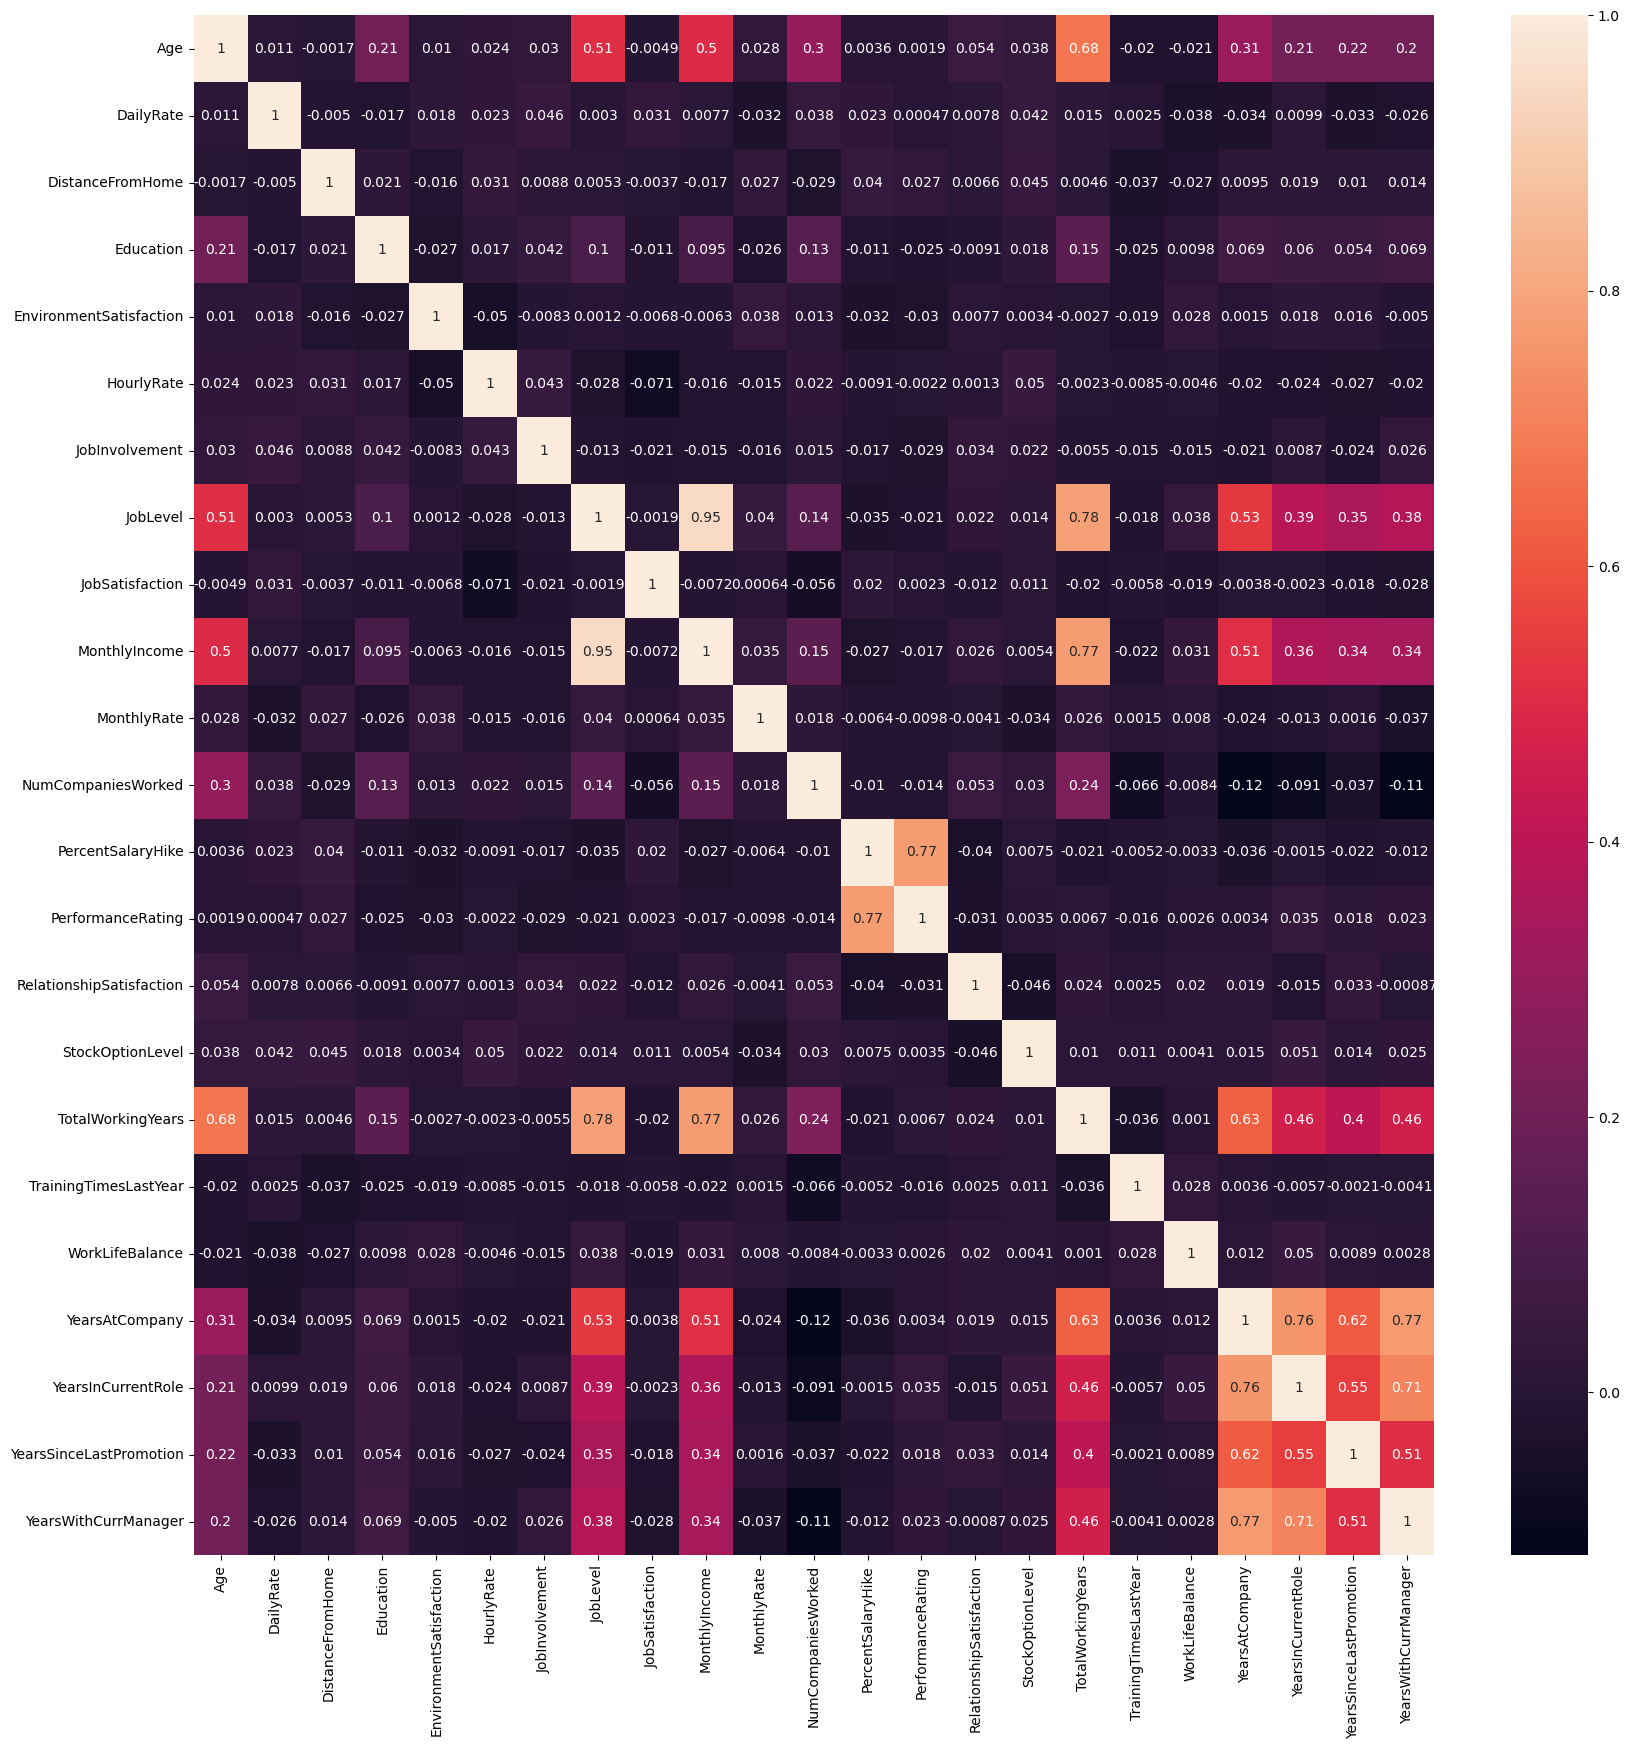

In [25]:
#correlation between variables
correlations = data.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

Data Preparation

Encoding
Predictor variables for machine learning algorithms can usually only be numerical numbers. Because they encode categorical labels with numerical values, label encoding becomes necessary. We will employ both Lable Encoding and One-Hot Encoding to prevent adding feature importance for categorical features with a high number of unique values.

In [26]:
print(data.shape)
data.head()

(1470, 31)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [27]:
# Create a label encoder object
le = LabelEncoder()

# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

3 columns were label encoded.


In [28]:
# convert rest of categorical variable into dummy
data = pd.get_dummies(data, drop_first=True)

In [29]:
print(data.shape)
data.head()

(1470, 45)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


In [30]:
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
data_col = list(data.columns)
data_col.remove('Attrition')
for col in data_col:
    data[col] = data[col].astype(float)
    data[[col]] = scaler.fit_transform(data[[col]])
data['Attrition'] = pd.to_numeric(data['Attrition'], downcast='float')
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,1.666667,0.0,4.571429,3.333333,1.25,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,3.333333,5.0,2.214286,1.666667,1.25,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,5.000000,5.0,4.428571,1.666667,0.00,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,5.000000,0.0,1.857143,3.333333,0.00,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.000000,5.0,0.714286,3.333333,0.00,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [31]:
data.shape

(1470, 45)

Splitting data into training and testing sets

In [32]:
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

In [33]:
# check X variable
X.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,3.579098,0.000000,1.25,1.666667,0.0,4.571429,3.333333,1.25,5.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.633500,1.250000,0.00,3.333333,5.0,2.214286,1.666667,1.25,1.666667,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,4.549034,0.178571,1.25,5.000000,5.0,4.428571,1.666667,0.00,3.333333,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,4.617037,0.357143,3.75,5.000000,0.0,1.857143,3.333333,0.00,3.333333,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,1.750179,0.178571,0.00,0.000000,5.0,0.714286,3.333333,0.00,1.666667,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [34]:
# check y variable
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float32

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [36]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1029, 44), (1029,), (441, 44), (441,))

Building Machine Learning Models

In [37]:
#SVM
svm = SVC(probability=True)
# fit the model
svm.fit(X_train, y_train)
# predict labels on X_test
y_pred = svm.predict(X_test)
# predict probability on X_test
y_pred_proba = svm.predict_proba(X_test)

AUC - ROC curve is a performance measurement for classification.ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes.

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       384
         1.0       0.88      0.25      0.38        57

    accuracy                           0.90       441
   macro avg       0.89      0.62      0.66       441
weighted avg       0.90      0.90      0.87       441



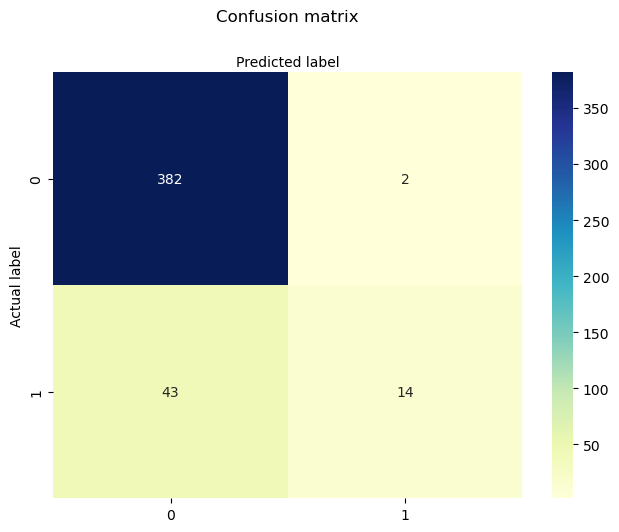

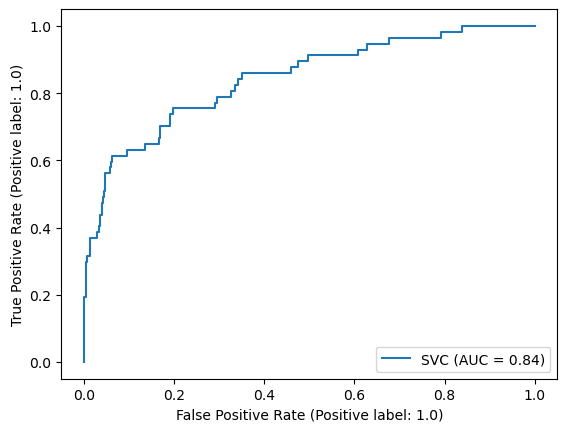

In [38]:
# accuracy on test set
accuracy_score(y_test, y_pred)
# AUC on test set
roc_auc_score(y_test, y_pred_proba[:,1])
# recall on test set
recall_score(y_test, y_pred)

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# classification report
print(classification_report(y_test, y_pred))
# AUC plot
RocCurveDisplay.from_estimator(svm, X_test, y_test)

In [39]:
#K Nearest Neighbour
knn = KNeighborsClassifier()
#fit the model
knn.fit(X_train, y_train)
#predict labels on X_test
y_pred = knn.predict(X_test)
#predict probability on X_test
y_pred_proba = knn.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       384
         1.0       0.58      0.19      0.29        57

    accuracy                           0.88       441
   macro avg       0.73      0.59      0.61       441
weighted avg       0.85      0.88      0.85       441



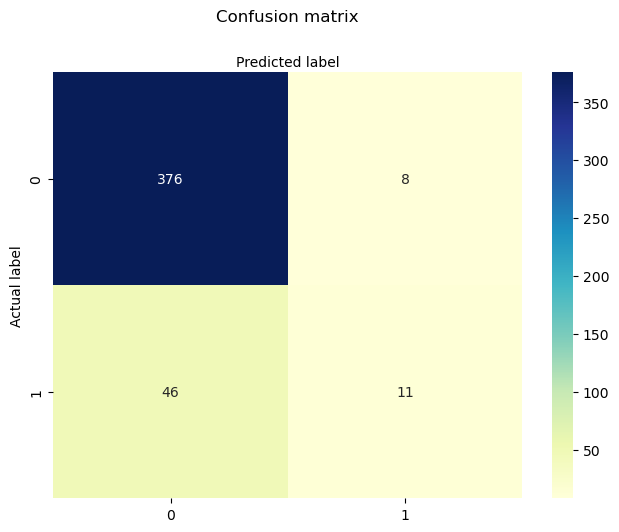

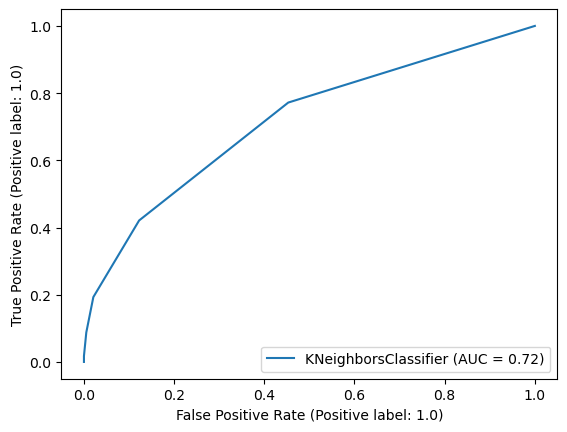

In [40]:
# accuracy on test set
accuracy_score(y_test, y_pred)
# AUC on test set
roc_auc_score(y_test, y_pred_proba[:,1])
# recall on test set
recall_score(y_test, y_pred)

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# classification report
print(classification_report(y_test, y_pred))
# AUC plot
RocCurveDisplay.from_estimator(knn, X_test, y_test)

In [41]:
#Logistic Regrssion
lr = LogisticRegression()
#fit the model
lr.fit(X_train, y_train)
#predict labels on X_test
y_pred = lr.predict(X_test)
#predict probability on X_test
y_pred_proba = lr.predict_proba(X_test)

[[370  14]
 [ 25  32]]
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95       384
         1.0       0.70      0.56      0.62        57

    accuracy                           0.91       441
   macro avg       0.82      0.76      0.79       441
weighted avg       0.91      0.91      0.91       441



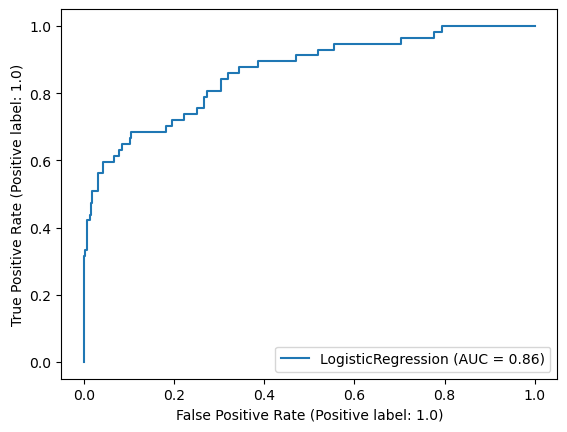

In [42]:
# accuracy on test set
accuracy_score(y_test, y_pred)
# AUC on test set
roc_auc_score(y_test, y_pred_proba[:,1])
# recall on test set
recall_score(y_test, y_pred)
# confusion matrix
print(confusion_matrix(y_test, y_pred))
# classification report
print(classification_report(y_test, y_pred))
#AUC plot
RocCurveDisplay.from_estimator(lr, X_test, y_test)

In [43]:
#Random Forest
rf = RandomForestClassifier()
#fit the model
rf.fit(X_train, y_train)
#predict labels on X_test
y_pred = rf.predict(X_test)
#predict probability on X_test
y_pred_proba = rf.predict_proba(X_test)

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       384
         1.0       0.78      0.25      0.37        57

    accuracy                           0.89       441
   macro avg       0.84      0.62      0.66       441
weighted avg       0.88      0.89      0.87       441



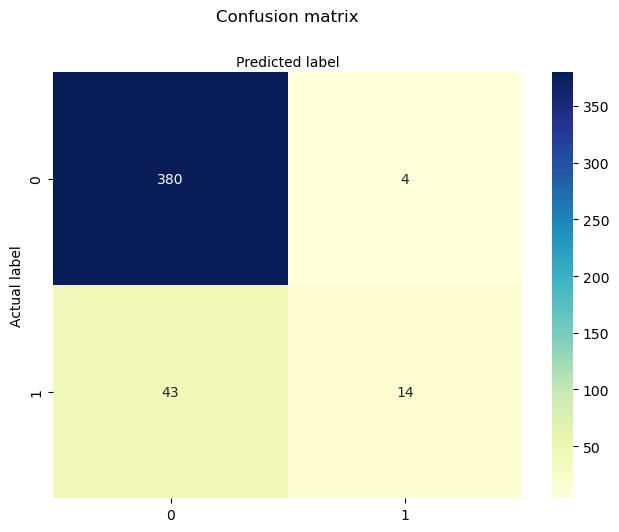

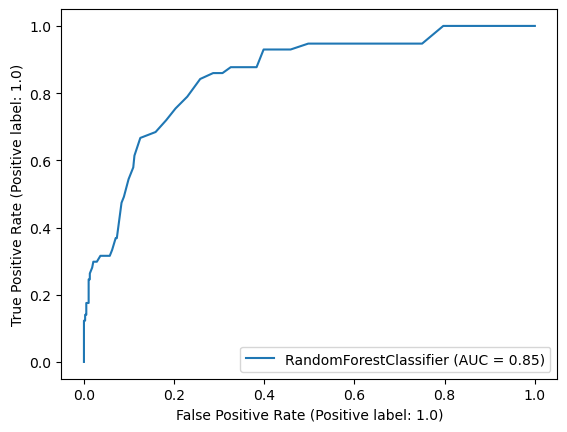

In [44]:
# accuracy on test set
accuracy_score(y_test, y_pred)
# AUC on test set
roc_auc_score(y_test, y_pred_proba[:,1])
# recall on test set
recall_score(y_test, y_pred)

# Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# classification report
print(classification_report(y_test, y_pred))
# AUC plot
RocCurveDisplay.from_estimator(rf, X_test, y_test)

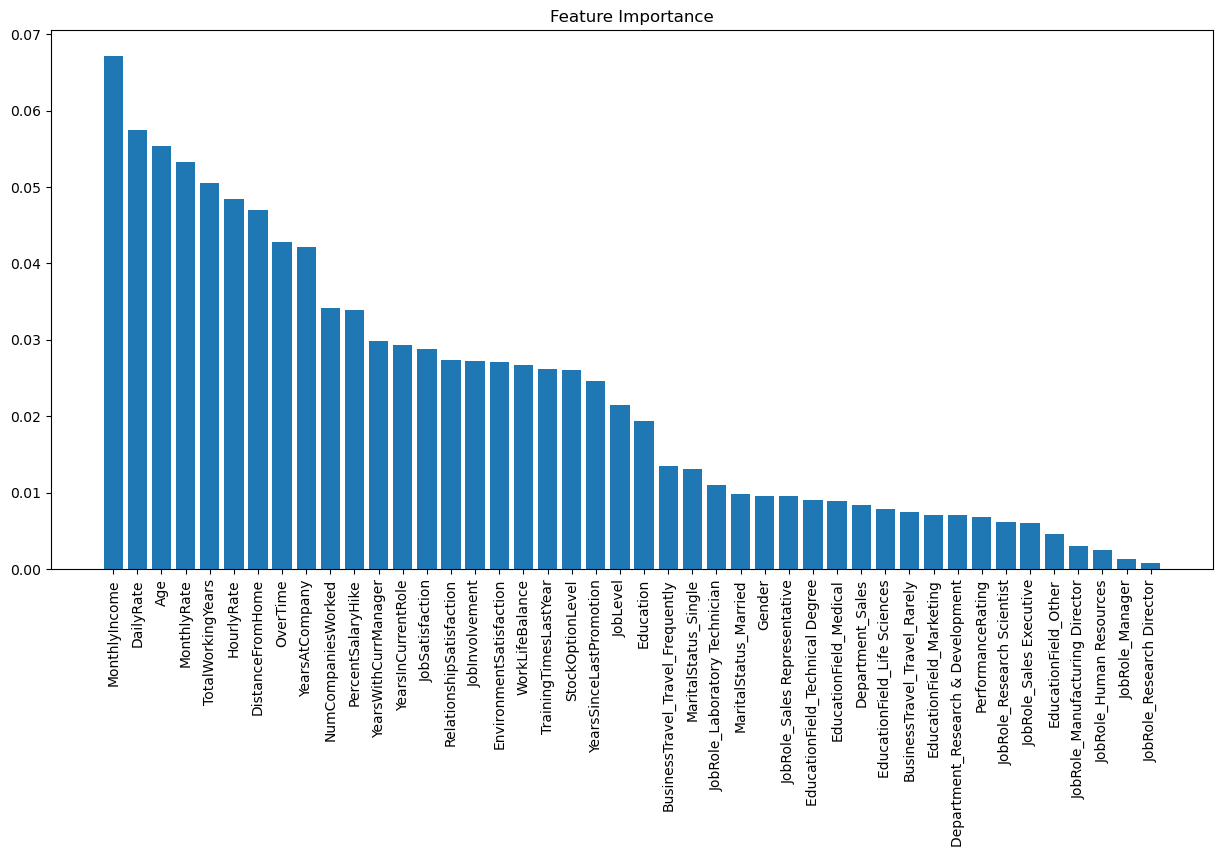

In [45]:
#Feature Importance graph
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

The Top 10 most important indicators are as below: 
MonthlyIncome, OverTime, Age, MonthlyRate, DistanceFromHome, DailyRate, TotalWorkingYears, YearsAtCompany, HourlyRate, YearsWithCurrManager.